<a href="https://colab.research.google.com/github/yongchuu/TensorflowTeam5/blob/main/%ED%85%90%ED%99%9C%EA%B8%B0%EA%B8%B0%EB%A7%90%EA%B3%A0%EC%82%AC(2021_2%ED%95%99%EA%B8%B0)_1206.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1-1. Kaggle 데이터셋 다운로드

In [1]:
## 1. Kaggle 데이터셋 로드
## https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/ 

## /content/kaggle.json

! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets download alxmamaev/flowers-recognition

! unzip flowers-recognition.zip

명령 구문이 올바르지 않습니다.
'cp'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'chmod'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
Traceback (most recent call last):
  File "c:\users\user\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\users\user\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\USER\anaconda3\Scripts\kaggle.exe\__main__.py", line 4, in <module>
  File "c:\users\user\anaconda3\lib\site-packages\kaggle\__init__.py", line 23, in <module>
    api.authenticate()
  File "c:\users\user\anaconda3\lib\site-packages\kaggle\api\kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in C:\Users\USER\.kaggle. Or use the environment method.
unzip:  cannot find either flowers-recognition.zip or flowers-recognition.zip.zip.


In [2]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

print(tf.__version__)

2.6.0


## 1-2. Optional - GPU Setting (local)

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True) # 메모리 증가 허용
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)


1 Physical GPUs, 1 Logical GPUs


In [4]:
#### 튜토리얼 방식의 이미지 로드

import pathlib
import glob

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url, 
                                   fname='flower_photos', 
                                   untar=True)
print(data_dir)
images = glob.glob(os.path.join(data_dir, '*', '*'))

C:\Users\USER\.keras\datasets\flower_photos


In [5]:
# import cv2

# img_path = '/content/flowers/daisy/100080576_f52e8ee070_n.jpg'
# img_path2 = '/content/flowers/daisy/10140303196_b88d3d6cec.jpg'

# img = cv2.imread(img_path)
# img2 = cv2.imread(img_path2)

# print(img.shape)
# print(img2.shape)

## 2-1. 모델 선택 / input shape
- mobilenetv3_small (256*256)
- mobilenetv3_large (256*256)
- resnet (256*256)
- EfficientNetB0 (224*224)
- EfficientNetB1 (240*240)
- EfficientNetB2 (260*260)
- EfficientNetB3 (300*300)
- EfficientNetB4 (380*380)
- EfficientNetB5 (456*456)
- EfficientNetB6 (528*528)
- EfficientNetB7 (600*600)

In [6]:
# select = ['mobilenetv3_small', 'mobilenetv3_large', 'resnet50', 'efficientnetb0', 'efficientnetb1', 'efficientnetb2', 'efficientnetb3', 'efficientnetb4', 'efficientnetb5', 'efficientnetb6', 'efficientnetb7']
set_model = 'mobilenetv3_small'

In [7]:
from tensorflow.keras.applications import EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3, EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7

batch_size = 32

# input image size dictionary
input_shape_dic = {
    'mobilenetv3_small': 256,
    'mobilenetv3_large': 256,
    'resnet50': 256,
    'efficientnetb0': 224,
    'efficientnetb1': 240,
    'efficientnetb2': 260,
    'efficientnetb3': 300,
    'efficientnetb4': 380,
    'efficientnetb5': 456,
    'efficientnetb6': 528,
    'efficientnetb7': 600,
}

# model selection dictionary
model_dic = {
    'mobilenetv3_small': tf.keras.applications.MobileNetV3Small,
    'mobilenetv3_large': tf.keras.applications.MobileNetV3Large,
    'resnet50': tf.keras.applications.resnet50.ResNet50,
    'efficientnetb0': tf.keras.applications.efficientnet.EfficientNetB0,
    'efficientnetb1': tf.keras.applications.efficientnet.EfficientNetB1,
    'efficientnetb2': tf.keras.applications.efficientnet.EfficientNetB2,
    'efficientnetb3': tf.keras.applications.efficientnet.EfficientNetB3,
    'efficientnetb4': tf.keras.applications.efficientnet.EfficientNetB4,
    'efficientnetb5': tf.keras.applications.efficientnet.EfficientNetB5,
    'efficientnetb6': tf.keras.applications.efficientnet.EfficientNetB6,
    'efficientnetb7': tf.keras.applications.efficientnet.EfficientNetB7,
}

img_height, img_width = input_shape_dic[set_model], input_shape_dic[set_model]
img_height, img_width

(256, 256)

## 2-2. 데이터 셋 생성 (train/ val)

In [8]:
## tf.keras.preprocessing.image_dataset_from_directory
## https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory 
## return tf.data.Dataset

## main_directory/
## ...class_a/
## ......a_image_1.jpg
## ......a_image_2.jpg
## ...class_b/
## ......b_image_1.jpg
## ......b_image_2.jpg

## Then calling image_dataset_from_directory(main_directory, labels='inferred') will return a tf.data.Dataset 
## that yields batches of images from the subdirectories class_a and class_b, together with labels 0 and 1 (0 corresponding to class_a and 1 corresponding to class_b).

data_path = data_dir #'/content/flowers'

# train DataSet Load
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
  data_path,
  validation_split=0.2, # validation_split	Optional float between 0 and 1, fraction of data to reserve for validation.
  subset="training", # subset	One of "training" or "validation". Only used if validation_split is set.
  seed=10,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode = 'categorical'
  )


Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [9]:
# validation_split DataSet Load
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
  data_path,
  validation_split=0.2, # validation_split	Optional float between 0 and 1, fraction of data to reserve for validation.
  subset="validation", # subset	One of "training" or "validation". Only used if validation_split is set.
  seed=10,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode = 'categorical')

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [10]:
# resize(224x224) and standardization Layer
resize_layer =  tf.keras.layers.Resizing(img_height, img_width)
# rescale_layer = tf.keras.layers.Rescaling(1./255)

In [11]:
# data augmenation Layer
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

## 3-2. Model Setting

In [12]:
# https://www.tensorflow.org/api_docs/python/tf/keras/applications/efficientnet

if 'mobilenet' in set_model:
  our_model = model_dic[set_model](
      alpha=1.0, 
      minimalistic=False, 
      include_top=False, 
      weights='imagenet', 
      input_tensor=None, 
      pooling=None,
      dropout_rate=0.2, 
      classifier_activation='softmax', 
      include_preprocessing=True
  )

elif 'resnet' in set_model:
  our_model = model_dic[set_model](
      include_top=False, 
      weights='imagenet'
  )

elif 'efficientnet' in set_model:
  our_model = model_dic[set_model](
      include_top=False, # Whether to include the fully-connected layer at the top of the network. Defaults to True. (top layer = 마지막 레이어)
      weights="imagenet", # One of None (random initialization), 'imagenet' (pre-training on ImageNet)
      input_tensor=None, # Optional Keras tensor (i.e. output of layers.Input()) to use as image input for the model.
      input_shape=None, # Optional shape tuple, only to be specified if include_top is False. It should have exactly 3 inputs channels.
      pooling=None, # None means that the output of the model will be the 4D tensor output of the last convolutional layer.
      # classes=5, # Number of classes
      classifier_activation='softmax'
  )

our_model.summary()

Model: "MobilenetV3small"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv (Conv2D)                   (None, None, None, 1 432         rescaling[0][0]                  
__________________________________________________________________________________________________
Conv/BatchNorm (BatchNormalizat (None, None, None, 1 64          Conv[0][0]                       
___________________________________________________________________________________

In [13]:
# model design

def model_design_sequential(main_model, rescale=True):
    model = tf.keras.Sequential()
    model.add(resize_layer)
    if rescale: 
        model.add(rescale_layer)
    model.add(data_augmentation)
    model.add(main_model)
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.Dense(5, activation='softmax'))

    return model

In [14]:
model = model_design_sequential(our_model,rescale=False)

In [15]:
# Model Compile

# if 'efficientnet' in set_model:
#     model.compile(
#         optimizer='adam', 
#         loss='sparse_categorical_crossentropy',
#         metrics=['accuracy']) 
# else:
model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), 
        loss=tf.keras.losses.CategoricalCrossentropy(),
        metrics=[tf.keras.metrics.CategoricalAccuracy()])

In [16]:
# Overffiting 방지를 위한 early_stopping Callback 정의
# 매 에포크 마다의 훈련 손실값 (loss), 매 에포크 마다의 훈련 정확도 (acc), 매 에포크 마다의 검증 손실값 (val_loss), 매 에포크 마다의 검증 정확도 (val_acc)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True)

## 4. 모델 학습

In [17]:
# mobilenet
train_size = tf.data.experimental.cardinality(train_dataset).numpy()*batch_size 
valid_size = tf.data.experimental.cardinality(val_dataset).numpy()*batch_size

max_epochs = 30

history_model = model.fit(
    train_dataset, 
    validation_data=val_dataset,
    epochs=max_epochs, 
    # steps_per_epoch=int(train_size / batch_size)
    callbacks = [early_stopping])

Epoch 1/30
92/92 [==============================] - 19s 147ms/step - loss: 0.8426 - categorical_accuracy: 0.6969 - val_loss: 0.5773 - val_categorical_accuracy: 0.7970
Epoch 2/30
92/92 [==============================] - 12s 132ms/step - loss: 0.3248 - categorical_accuracy: 0.8866 - val_loss: 0.4719 - val_categorical_accuracy: 0.8379
Epoch 3/30
92/92 [==============================] - 12s 131ms/step - loss: 0.2509 - categorical_accuracy: 0.9046 - val_loss: 0.3693 - val_categorical_accuracy: 0.8801
Epoch 4/30
92/92 [==============================] - 12s 128ms/step - loss: 0.1895 - categorical_accuracy: 0.9305 - val_loss: 0.3568 - val_categorical_accuracy: 0.8856
Epoch 5/30
92/92 [==============================] - 12s 132ms/step - loss: 0.1503 - categorical_accuracy: 0.9486 - val_loss: 0.3959 - val_categorical_accuracy: 0.8733
Epoch 6/30
92/92 [==============================] - 13s 140ms/step - loss: 0.1188 - categorical_accuracy: 0.9608 - val_loss: 0.3752 - val_categorical_accuracy: 0.880

## 5. 학습 결과 확인

In [18]:
history_model.history.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

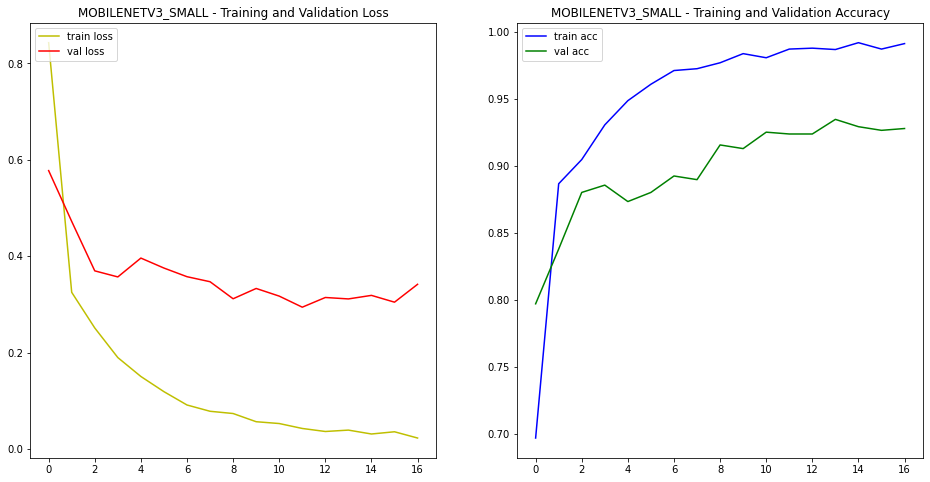

In [19]:
import matplotlib.pyplot as plt

def visual(history, model_name):
  plt.figure(figsize=(16, 8))
  plt.subplot(1, 2, 1) # nrows, ncols, index
  plt.plot(history.history['loss'], 'y', label='train loss')
  plt.plot(history.history['val_loss'], 'r', label='val loss')
  plt.title('{} - Training and Validation Loss'.format(model_name.upper()))
  plt.legend(loc='upper left')

  plt.subplot(1, 2, 2) # nrows, ncols, index
  plt.plot(history.history['categorical_accuracy'], 'b', label='train acc')
  plt.plot(history.history['val_categorical_accuracy'], 'g', label='val acc')
  plt.title('{} - Training and Validation Accuracy'.format(model_name.upper()))
  plt.legend(loc='upper left')
  plt.show()


visual(history_model, set_model)



In [22]:
# Learning 후 베스트 epoch 확인
hist = model.history.history['categorical_accuracy']
n_epochs_best = np.argmax(hist)
print("best epoch: ",n_epochs_best+1)

acc = history_model.history['categorical_accuracy']
val_acc = history_model.history['val_categorical_accuracy']

print("train_acccuracy : ",acc[n_epochs_best],"\nValidation_acccuracy : ",val_acc[n_epochs_best])

best epoch:  15
train_acccuracy :  0.9918256402015686 
Validation_acccuracy :  0.9291552901268005


## 6. 실제 꽃 사진 Load / Test

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [23]:
# load test flower pictures
img_dir = 'C:/JupyterProject/flowers_testset'

test_batch_size = 25
test_dataset = tf.keras.utils.image_dataset_from_directory(
    img_dir, 
    labels='inferred', 
    label_mode='categorical',
    batch_size=test_batch_size,
    image_size=(img_height,img_width)
    )

Found 25 files belonging to 5 classes.


In [24]:
# split(image and labels)
for images, labels in test_dataset:  # only take first element of dataset
    flower_images = images.numpy()
    flower_labels = labels.numpy()

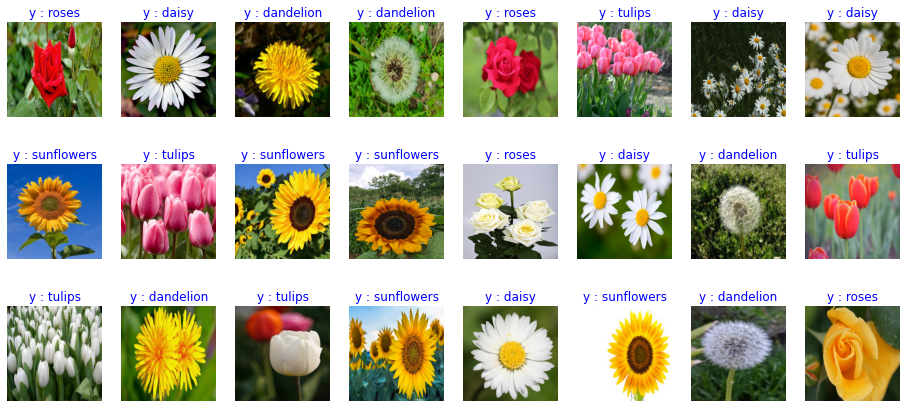

In [27]:
# Test Set Classification Visulization


class_names = train_dataset.class_names

np.random.seed(10)

sample_batch_size = 24
batch_index = np.random.choice(len(flower_images), size=sample_batch_size, replace=False)

batch_xs = flower_images[batch_index]
batch_ys = flower_labels[batch_index]

# 모델 예측
y_pred_ = model(batch_xs, training=False)

fig = plt.figure(figsize=(16, 10))
for i, (img, y_hat) in enumerate(zip(batch_xs, y_pred_)):
    p = fig.add_subplot(4, 8, i+1)
    # model output으로 one-hot 변환된 y-value를 np.argmax를 통해 index값으로 재변환 한 후 비교
    if np.argmax(y_hat) == np.argmax(batch_ys[i]): # y_hat (예측한 값) 이 정답 label 과 일치한다면, 
        p.set_title("y : {}".format(class_names[np.argmax(y_hat)]), color='blue') # 맞춘경우 Blud
    else:
        p.set_title("y : {}".format(np.argmax(y_hat)), color='red') # 틀린경우 Red
        
    show_img = np.array(img/np.amax(img)*255, np.int32) # 0~255 변환    

  
    p.imshow(show_img)
    p.axis('off') # 축표시제거

## 7. 촬영 꽃 사진으로 도감 일기장 만들기

In [1]:
import cv2

# Image Brightness Control funciton
def increase_brightness(img, value=50):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img


def toPaintWithPaper(img1,img2 ,h,w):
    img1 = cv2.xphoto.oilPainting(img1, 7, 5) # 수치크기에 따라 Painting 느낌 증가
    img1 = increase_brightness(img1, value=100)
    rs_img1 = cv2.resize(img1, dsize=(h, w), interpolation=cv2.INTER_AREA) # resize
    rs_img2 = cv2.resize(img2, dsize=(h, w), interpolation=cv2.INTER_AREA) # resize
    img = cv2.addWeighted(rs_img1, 0.7, rs_img2, 0.3, 0.5, dst=None, dtype=None) # 이미지결합
 
    return img


In [8]:
# Test Image selection
# daisy : 1
# dandelion : 2
# roses : 3
# sunflowers : 4
# tulips : 5
# flower number : 1 ~ 5

flower = 4
flower_number = 3

if flower == 1: flower_sel = "daisy"
elif flower == 2: flower_sel = "dandelion"
elif flower == 3: flower_sel = "roses"
elif flower == 4: flower_sel = "sunflowers"
elif flower == 5: flower_sel = "tulips"
else : flower_sel = "daisy"

flower_path = "C:/JupyterProject/flowers_testset/"+flower_sel+"/"+flower_sel+"_test"+str(flower_number)+".jpg"
print(flower_path)


C:/JupyterProject/flowers_testset/sunflowers/sunflowers_test3.jpg


In [9]:
img1 = cv2.imread(flower_path)
img2 = cv2.imread('C:/JupyterProject/paper_img/paper3.png')

img = toPaintWithPaper(img1,img2, 480, 480)

cv2.imshow("Flower Original", img1)
cv2.imshow("Flower Paper", img)

cv2.waitKey(0)
cv2.destroyAllWindows()
